In [3]:
import numpy as np
import pandas as pd

#SERIES FROM LIST

In [9]:
students=["a","b","c","d"]
print(pd.Series(students))
print()
rollno=[1,2,3,4]
print(pd.Series(rollno))

0    a
1    b
2    c
3    d
dtype: object

0    1
1    2
2    3
3    4
dtype: int64


##custom indexing using a parameter index

In [10]:
pd.Series(students,index=rollno)

,0
1,a
2,b
3,c
4,d


##providing custom name to a series

In [17]:
marks=pd.Series(students,index=rollno,name="CS420")

In [18]:
print(marks)

1    a
2    b
3    c
4    d
Name: CS420, dtype: object


#---------------------------------------------#

#SERIES FROM DICTIONARY

##key becomes index and value becomes corresponding value

In [98]:
marks={
    'maths':58,
    'english':79,
    'science':90,
    'hindi':100
}

marks_series=pd.Series(marks,name="MID-SEM")
print(marks_series)

maths       58
english     79
science     90
hindi      100
Name: MID-SEM, dtype: int64


#--------------------------------------------------------------------

#ATTRIBUTES OF SERIES

In [27]:
#size
marks_series.size


4

In [28]:
#types
marks_series.dtype

dtype('int64')

In [29]:
#name
marks_series.name

'MID-SEM'

In [30]:
#is_unique -- tell whether all items are unique or not
marks_series.is_unique

True

In [31]:
#index--gives all index values
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [33]:
#values--gives all values
marks_series.values

array([ 58,  79,  90, 100])

#-----------------------------------------------------------------

#SERIES USING READ_CSV

In [37]:
# with one col
# pd.read_csv('/content/subs.csv') #its currently not a series, its a dataframe
subs=pd.read_csv('/content/subs.csv')
print(pd.read_csv('/content/subs.csv')) #its currently not a series, its a dataframe
print()
print(type(pd.read_csv('/content/subs.csv')))
print()
series=subs.squeeze()
print(type(series))
print(series)

     Subscribers gained
0                    48
1                    57
2                    40
3                    43
4                    44
..                  ...
360                 231
361                 226
362                 155
363                 144
364                 172

[365 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.series.Series'>
0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64


In [28]:
#with 2 cols
df=pd.read_csv('/content/kohli_ipl.csv',index_col='match_no')
print(type(df))
vk=df.squeeze()
print(type(vk))
print(vk)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64


In [34]:
movies=pd.read_csv('/content/bollywood.csv')
print(movies)
movies=pd.read_csv('/content/bollywood.csv',index_col='movie')
print(movies.squeeze())

                                     movie              lead
0                 Uri: The Surgical Strike     Vicky Kaushal
1                            Battalion 609       Vicky Ahuja
2     The Accidental Prime Minister (film)       Anupam Kher
3                          Why Cheat India     Emraan Hashmi
4                          Evening Shadows  Mona Ambegaonkar
...                                    ...               ...
1495                Hum Tumhare Hain Sanam    Shah Rukh Khan
1496                   Aankhen (2002 film)  Amitabh Bachchan
1497                       Saathiya (film)      Vivek Oberoi
1498                        Company (film)        Ajay Devgn
1499                  Awara Paagal Deewana      Akshay Kumar

[1500 rows x 2 columns]
movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening S

#SERIES METHODS---------------

In [41]:
#head and tail --- by default 5 , we can also pass as argumnet
print(subs.head(3))
print()
print(vk.tail())


   Subscribers gained
0                  48
1                  57
2                  40

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64


In [46]:
#sample ---- shows 1 row randomly(normally gives only one row, optional parameter )
print(movies.sample(5))

                                          lead
movie                                         
Ishq Vishk                       Shahid Kapoor
Satyameva Jayate (2018 film)      John Abraham
Ankur Arora Murder Case          Kay Kay Menon
Student of the Year 2             Tiger Shroff
Kis Kis Ki Kismat             Mallika Sherawat


In [50]:
#value_count -> movies(how many entries of a key)--in ascending order
movies.value_counts()

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
...,...
Kashmira Shah,1
Kartik Elangovan,1
Karisma Kapoor,1


In [54]:
#sort_values -> inplace | ascending by default | (not permanent changes)
# for permanent changes -- parameter (inplace=True)
vk.sort_values(ascending=False)

,runs
match_no,
128,113
126,109
123,108
164,100
120,100
...,...
93,0
211,0
130,0


In [55]:
#sort_index ->inplace by default (can paramter inplace=True)
movies.sort_index()

,lead
movie,
1920 (film),Rajniesh Duggall
1920: London,Sharman Joshi
1920: The Evil Returns,Vicky Ahuja
1971 (2007 film),Manoj Bajpayee
2 States (2014 film),Arjun Kapoor
...,...
Zindagi 50-50,Veena Malik
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi Tere Naam,Mithun Chakraborty


#SERIES MATHS METHODS

In [59]:
#count--gives total values(does not count missing values but size does)
vk.count()

215

In [60]:
#sum/product
subs.sum()

,0
Subscribers gained,49510


In [68]:
#mean,median,mode,std,var
print(subs.mean())
print()
print(vk.median())
print()
print(movies.mode())
print()
print(subs.std())
print()
print(vk.var())
print()
print(subs.min())
print()
print(subs.max())

Subscribers gained    135.643836
dtype: float64

24.0

           lead
0  Akshay Kumar

Subscribers gained    62.675023
dtype: float64

688.0024777222344

Subscribers gained    33
dtype: int64

Subscribers gained    396
dtype: int64


In [69]:
#describe
vk.describe()

,runs
count,215.000000
mean,30.855814
std,26.229801
min,0.000000
25%,9.000000
50%,24.000000
75%,48.000000
max,113.000000


#SERIES INDEXING

In [78]:
#integer indexing
x=pd.Series([12,13,1,414,52])
print(x[0])
print(movies)

12
                                                  lead
movie                                                 
Uri: The Surgical Strike                 Vicky Kaushal
Battalion 609                              Vicky Ahuja
The Accidental Prime Minister (film)       Anupam Kher
Why Cheat India                          Emraan Hashmi
Evening Shadows                       Mona Ambegaonkar
...                                                ...
Hum Tumhare Hain Sanam                  Shah Rukh Khan
Aankhen (2002 film)                   Amitabh Bachchan
Saathiya (film)                           Vivek Oberoi
Company (film)                              Ajay Devgn
Awara Paagal Deewana                      Akshay Kumar

[1500 rows x 1 columns]


In [88]:
#slicing
vk[5:16]

,runs
match_no,
6,9
7,34
8,0
9,21
10,3
11,10
12,38
13,3
14,11


In [89]:
#fancy indexing
vk[[1,3,4,5]]

,runs
match_no,
1,1
3,13
4,12
5,1


#EDITING ITEMS IN SERIES

In [99]:
#using indexing
print(marks_series)
marks_series[0]=100
print()
print(marks_series)

maths       58
english     79
science     90
hindi      100
Name: MID-SEM, dtype: int64

maths      100
english     79
science     90
hindi      100
Name: MID-SEM, dtype: int64


<ipython-input-99-11ac6392f1da>:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[0]=100


In [101]:
#what if an index does not exist | we want to add anything in our series
marks_series['sst']=90
marks_series

,MID-SEM
maths,100
english,79
science,90
hindi,100
sst,90


In [102]:
#using sliding
# runs_ser[2:4]=[100,100]

In [103]:
#using fancy indexing
# runs_ser[[0,2,5]]=[0,0,0]

In [104]:
#type conversions
list(marks_series)

[100, 79, 90, 100, 90]

In [105]:
dict(marks_series)

{'maths': 100, 'english': 79, 'science': 90, 'hindi': 100, 'sst': 90}

In [113]:
#membership operator
print(0 in vk) #false bcoz it works on index not on values
print(0 in vk.values) #to search in values

False
True


In [117]:
#loop -- iterates over value
# for i in movies.index:
#   print(i)

In [118]:
#arithmetic operators[broadcasting]--adding in all numbers
100-marks_series

,MID-SEM
maths,0
english,21
science,10
hindi,0
sst,10


In [119]:
#relational operators --return boolean array
vk>=50

,runs
match_no,
1,False
2,False
3,False
4,False
5,False
...,...
211,False
212,False
213,True


#boolean indexing on series

In [125]:
#find number of 50's and 100's
print(vk[vk>=50].count())
print(vk[vk>=100].count())

50
5


#plotting graphs

<Axes: >

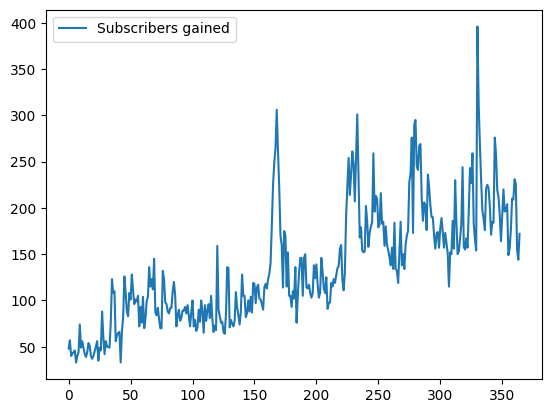

In [127]:
subs.plot()

<Axes: ylabel='count'>

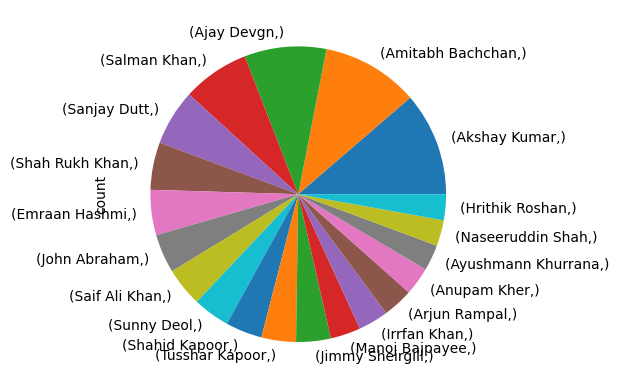

In [131]:
#kinds may be pie,bar,
movies.value_counts().head(20).plot(kind='pie')